# Discrete-Time Fourier Transform

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
from scipy.signal import convolve, freqz

RANGE = 11

n = np.arange(RANGE)
impulse = np.zeros(RANGE)
impulse[0] = 1
zero_input = np.zeros(RANGE)

# A. Discrete-Time Fourier Transform (DTFT)

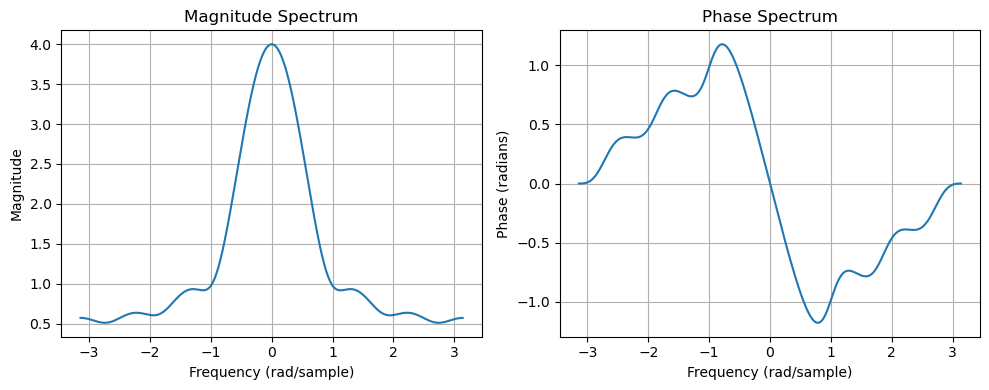

In [3]:
N = 128 # Number of samples
n = np.arange(N)

x = np.zeros(N)
x[:7] = np.array([1, 6/7,5/7, 4/7, 3/7, 2/7, 1/7])

# FFT
N_fft = 1024 # FFT Size (For smoother DTFT)

X = fft.fft(x, N_fft)
w = np.linspace(-np.pi, np.pi, N_fft, endpoint=False)

# Shifting FFT 
X_shifted = np.fft.fftshift(X)

# Compute magnitude and phase
magnitude = np.abs(X_shifted)
phase = np.angle(X_shifted)
# magnitude = np.abs(X)
# phase = np.angle(X)


# Plot Magnitude Spectrum
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(w, magnitude)
plt.title("Magnitude Spectrum")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Magnitude")
plt.grid()

# Plot Phase Spectrum
plt.subplot(1,2,2)
plt.plot(w, phase)
plt.title("Phase Spectrum")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Phase (radians)")
plt.grid()

plt.tight_layout()
plt.show()

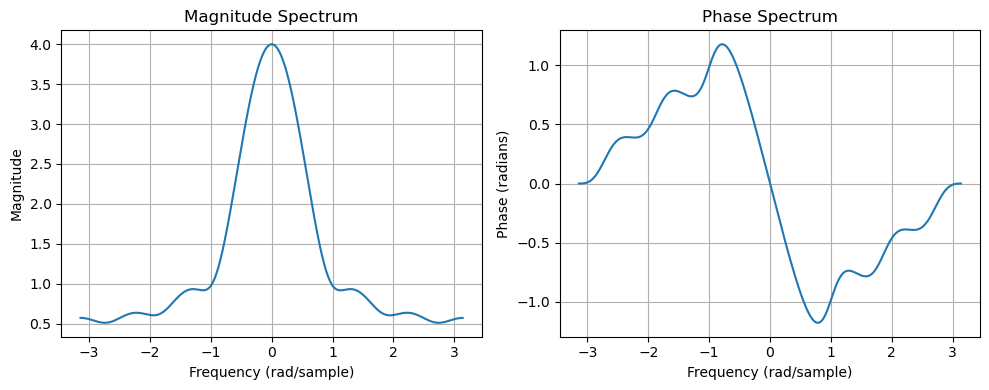

In [4]:
# Part 2. Calculating DTFT Manually and Plotting

x = 1 + (6/7)*np.exp(-1j*w) + (5/7)*np.exp(-2j*w) + (4/7)*np.exp(-3j*w) + (3/7)*np.exp(-4j*w) + (2/7)*np.exp(-5j*w) + (1/7)*np.exp(-6j*w)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(w, np.abs(x))
plt.title("Magnitude Spectrum")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Magnitude")
plt.grid()

plt.subplot(1,2,2)
plt.plot(w, np.angle(x))
plt.title("Phase Spectrum")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Phase (radians)")
plt.grid()

plt.tight_layout()
plt.show()

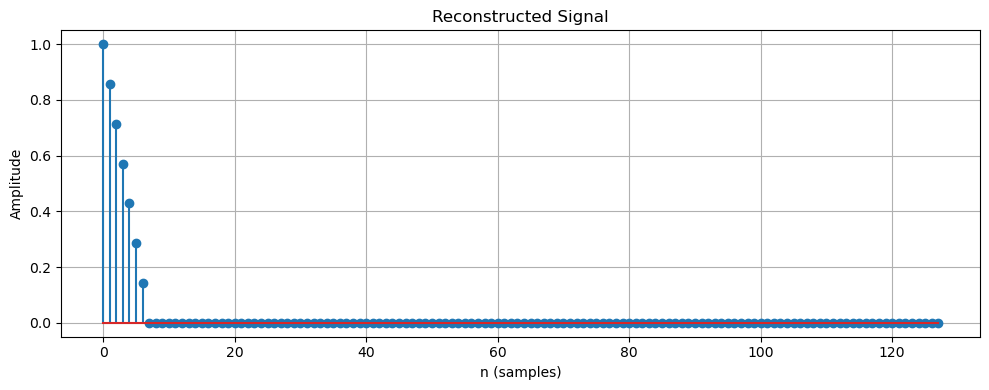

In [5]:
# 3. Reconstructing the Signal

x_reconstructed = fft.ifft(X)
x_reconstructed = x_reconstructed[:N].real

plt.figure(figsize=(10,4))
plt.stem(n, x_reconstructed)
plt.title("Reconstructed Signal")
plt.xlabel("n (samples)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

# B. Time Convolution

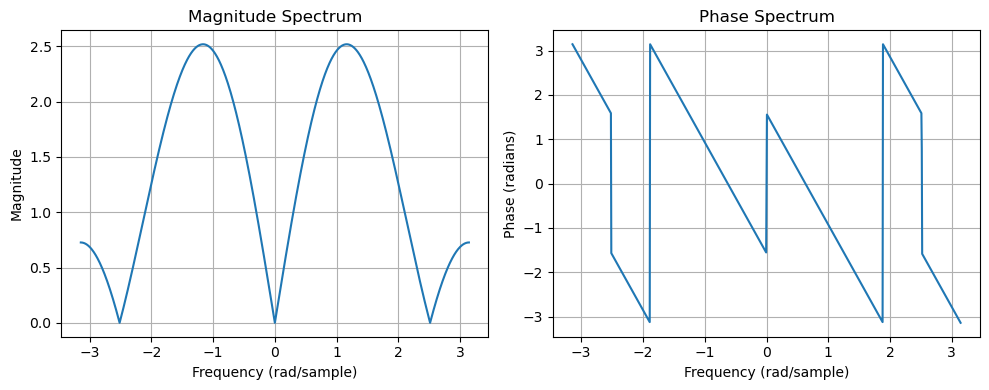

In [6]:
omega = np.linspace(-np.pi, np.pi, 1001)
n = np.arange(10)
x = np.sin((2*np.pi*n)/(5)) * (n >= 0) * (n < 5)

W_omega = np.exp(-1j)**np.dot((np.arange(x.size).reshape(x.size, 1)), omega.reshape(1, 1001))

X = np.dot(x, W_omega)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(omega, np.abs(X))
plt.title("Magnitude Spectrum")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Magnitude")
plt.grid()

plt.subplot(1,2,2)
plt.plot(omega, np.angle(X))
plt.title("Phase Spectrum")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Phase (radians)")
plt.grid()

plt.tight_layout()
plt.show()


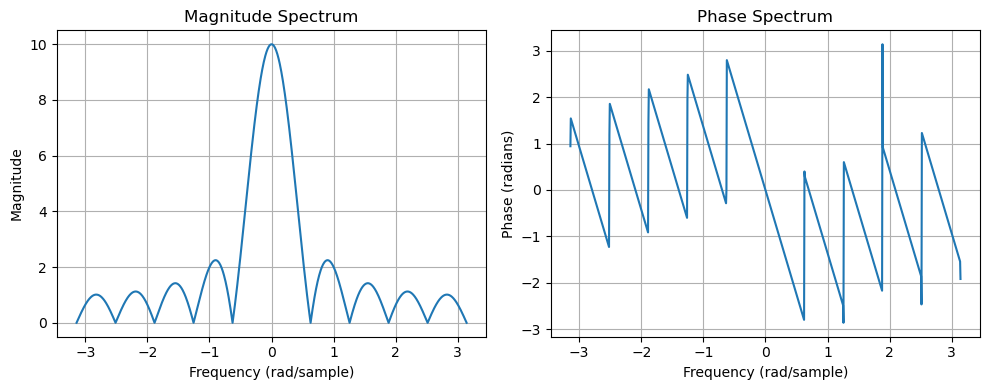

In [7]:
h = np.ones(10)

H = np.dot(h, W_omega)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(omega, np.abs(H))
plt.title("Magnitude Spectrum")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Magnitude")
plt.grid()

plt.subplot(1,2,2)
plt.plot(omega, np.angle(H))
plt.title("Phase Spectrum")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Phase (radians)")
plt.grid()

plt.tight_layout()
plt.show()


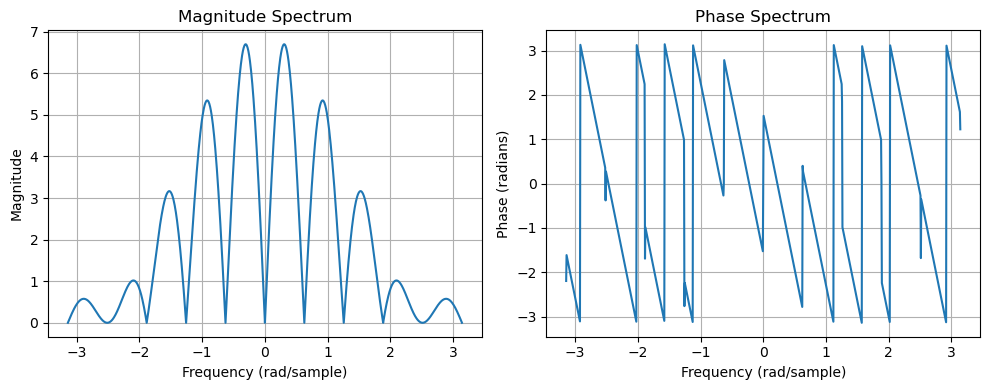

In [8]:
Y = X * H

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(omega, np.abs(Y))
plt.title("Magnitude Spectrum")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Magnitude")
plt.grid()

plt.subplot(1,2,2)
plt.plot(omega, np.angle(Y))
plt.title("Phase Spectrum")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Phase (radians)")
plt.grid()

plt.tight_layout()
plt.show()

[ 0.00000000e+00  9.51056516e-01  1.53884177e+00  9.51056516e-01
  1.11022302e-16  1.11022302e-16  1.11022302e-16  1.11022302e-16
  1.11022302e-16  1.11022302e-16  1.11022302e-16 -9.51056516e-01
 -1.53884177e+00 -9.51056516e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00]


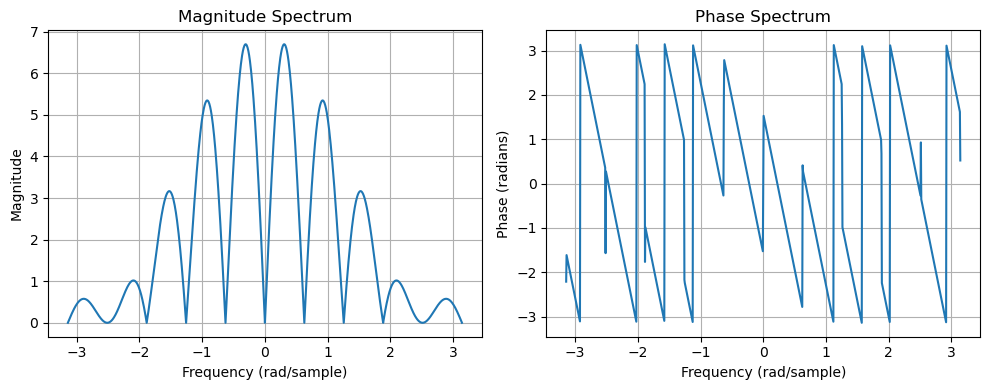

In [9]:
y = convolve(x, h, mode='full')
print(y)

W_omega = np.exp(-1j)**np.dot((np.arange(y.size).reshape(y.size, 1)), omega.reshape(1, 1001))

Y = np.dot(y, W_omega)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(omega, np.abs(Y))
plt.title("Magnitude Spectrum")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Magnitude")
plt.grid()

plt.subplot(1,2,2)
plt.plot(omega, np.angle(Y))
plt.title("Phase Spectrum") 
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Phase (radians)")
plt.grid()

plt.tight_layout()
plt.show()



# C. FIR Filter Design by Frequency Sampling

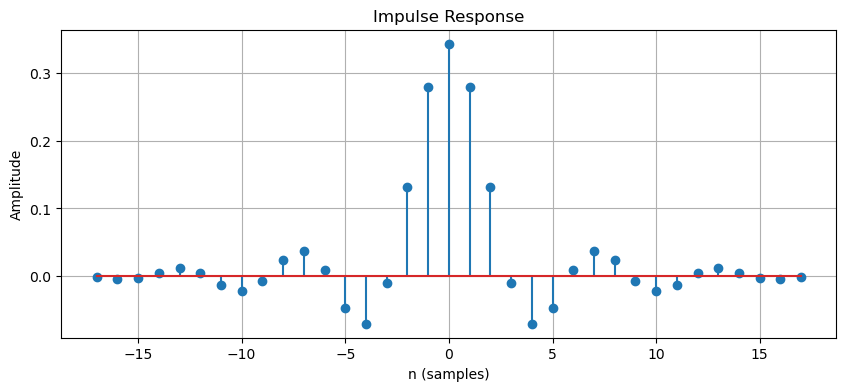

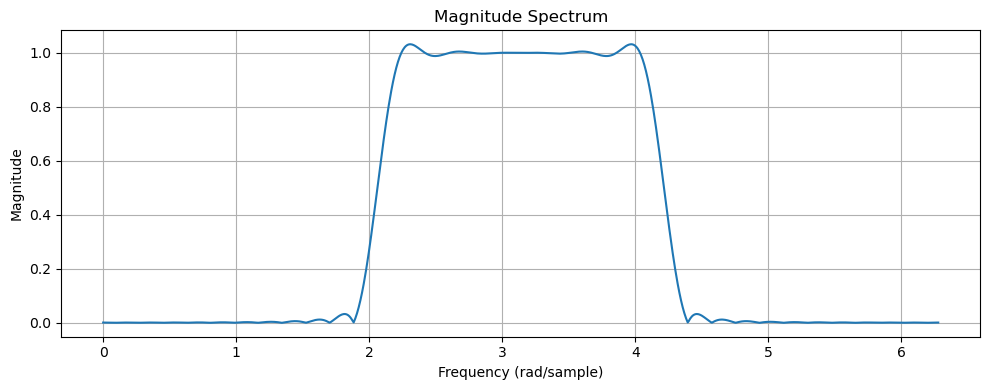

In [24]:
N = 35
M = (N - 1) // 2  # Middle index of the sequence
n = np.arange(-M, M+1)
w = np.linspace(-np.pi, np.pi, N)
H = np.where(np.abs(w) >= 2*np.pi/3, 1, 0)

h = fft.ifft(H)
h = h[:N].real

h = fft.fftshift(h)

w_freq, H_new = freqz(h, 1, worN= np.arange(0, 2*np.pi, 2*np.pi/1001))
H_new = fft.fftshift(H_new)

plt.figure(figsize=(10,4))
plt.stem(n, h)
plt.title("Impulse Response")
plt.xlabel("n (samples)")
plt.ylabel("Amplitude")
plt.grid()

plt.figure(figsize=(10,4))
plt.plot(w_freq, np.abs((H_new)))
plt.title("Magnitude Spectrum")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Magnitude")
plt.grid()

plt.tight_layout()
plt.show()



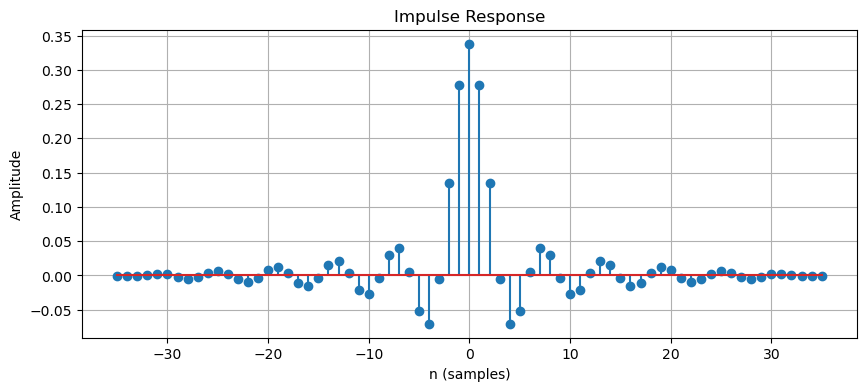

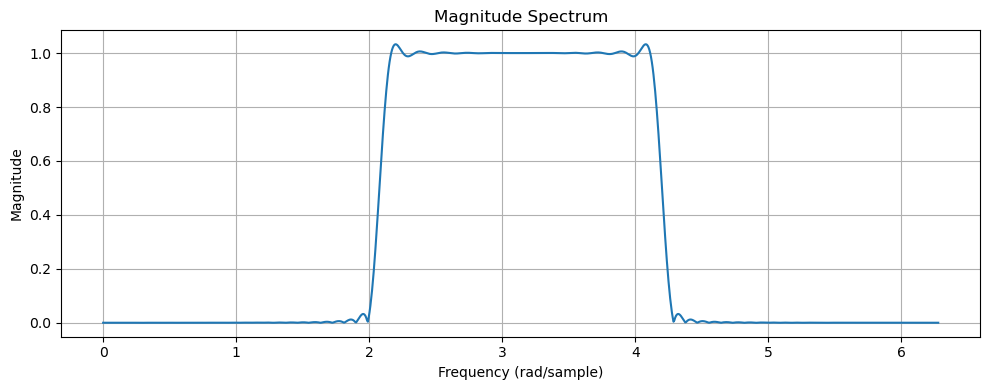

In [23]:
N = 71
M = (N - 1) // 2  # Middle index of the sequence
n = np.arange(-M, M+1)
w = np.linspace(-np.pi, np.pi, N)
H = np.where(np.abs(w) >= 2*np.pi/3, 1, 0)

h = fft.ifft(H)
h = h[:N].real

h = fft.fftshift(h)

w_freq, H_new = freqz(h, 1, worN= np.arange(0, 2*np.pi, 2*np.pi/1001))
H_new = fft.fftshift(H_new)



plt.figure(figsize=(10,4))
plt.stem(n, h)
plt.title("Impulse Response")
plt.xlabel("n (samples)")
plt.ylabel("Amplitude")
plt.grid()

plt.figure(figsize=(10,4))
plt.plot(w_freq, np.abs((H_new)))
plt.title("Magnitude Spectrum")
plt.xlabel("Frequency (rad/sample)")
plt.ylabel("Magnitude")
plt.grid()

plt.tight_layout()
plt.show()